In [1]:
import pandas as pd

In [31]:
pd.read_csv('C:\minipj_1\주차면적\data\자동차수_주차면수_상관.csv')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\User\AppData\Local\Temp\ipykernel_8128\2474587746.py:1: SyntaxWarning: invalid escape sequence '\m'
  pd.read_csv('C:\minipj_1\주차면적\data\자동차수_주차면수_상관.csv')


,자동차수,주차면수
0,2977599,3595750
1,2969184,3584262
2,2973877,3760461
3,3013541,3821527
4,3056588,3877326
5,3083007,3983291
6,3116256,4053875
7,3124651,4129723
8,3124157,4250682
9,3157353,4327614


In [32]:
df = pd.read_csv('C:\minipj_1\주차면적\data\자동차수_주차면수_상관.csv')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\User\AppData\Local\Temp\ipykernel_8128\1448635552.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('C:\minipj_1\주차면적\data\자동차수_주차면수_상관.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   자동차수    14 non-null     int64
 1   주차면수    14 non-null     int64
dtypes: int64(2)
memory usage: 356.0 bytes


In [6]:
df.head()

,자동차수,주차면수
0,2977599,3595750
1,2969184,3584262
2,2973877,3760461
3,3013541,3821527
4,3056588,3877326


In [33]:
df[['자동차수','주차면수']].corr

<bound method DataFrame.corr of        자동차수     주차면수
0   2977599  3595750
1   2969184  3584262
2   2973877  3760461
3   3013541  3821527
4   3056588  3877326
5   3083007  3983291
6   3116256  4053875
7   3124651  4129723
8   3124157  4250682
9   3157353  4327614
10  3176736  4354516
11  3193349  4501875
12  3191159  4548788
13  3176930  4527217>

In [34]:
x = df['자동차수'].values

In [35]:
y=df['주차면수'].values

In [36]:
from scipy import stats

In [37]:
coef = stats.pearsonr(df['자동차수'], df['주차면수'])

In [38]:
coef

PearsonRResult(statistic=np.float64(0.972781044364191), pvalue=np.float64(5.53673409000123e-09))

In [39]:
import matplotlib.pyplot as plt

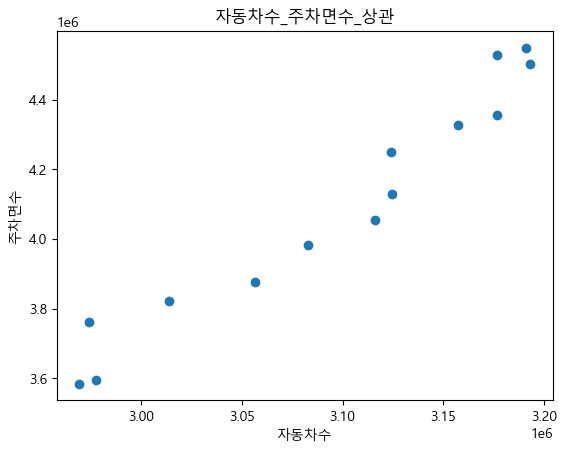

In [40]:
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트
plt.scatter(x,y)
plt.title('자동차수_주차면수_상관')
plt.xlabel('자동차수')
plt.ylabel('주차면수')
plt.show()

In [41]:
import numpy as np

In [42]:
car_count = df['자동차수'].values
parking = df['주차면수'].values

In [43]:
np.cov(car_count, parking, ddof=1)

array([[6.99371953e+09, 2.72959612e+10],
       [2.72959612e+10, 1.12579256e+11]])

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_input, test_input, train_target, test_target = train_test_split(
    car_count, parking, random_state=42)

In [56]:
train_input = train_input.reshape(-1,1)

In [57]:
train_input

array([[3083007],
       [3124157],
       [2973877],
       [2969184],
       [3176930],
       [3056588],
       [3124651],
       [3176736],
       [3013541],
       [3116256]])

In [54]:
test_input = test_input.reshape(-1,1)

In [55]:
test_input

array([[3157353],
       [3193349],
       [2977599],
       [3191159]])

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(train_input, train_target)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [66]:
lr.coef_

array([3.61629608])

In [67]:
lr.intercept_

np.float64(-7109301.966598267)

In [68]:
print('훈련 데이터 성능 :', lr.score(train_input, train_target))
print('테스트 데이터 성능 :', lr.score(test_input, test_target))

훈련 데이터 성능 : 0.9132682720700193
테스트 데이터 성능 : 0.9621709027014121


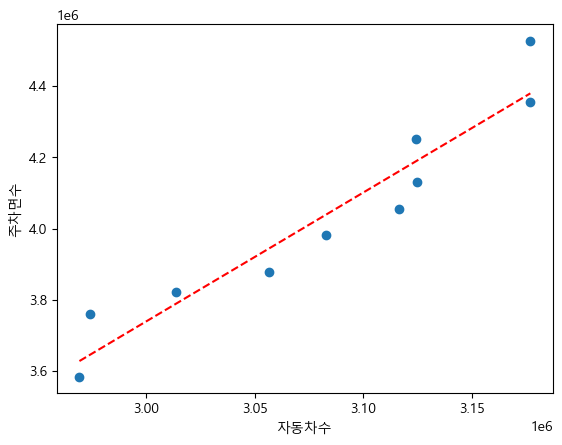

In [ ]:
plt.scatter(train_input, train_target)
point_start = train_input.min()
point_end = train_input.max()
plt.plot([point_start, point_end], 
         [point_start * lr.coef_ + lr.intercept_, point_end * lr.coef_ + lr.intercept_], 
         color='red', linestyle='--')


plt.xlabel('자동차수')
plt.ylabel('주차면수')
plt.show()